# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

All work is done below, with numbered headings to indicate my respoinses to the problems listed above.

In [2]:
# import libraries
import pandas as pd
import numpy as np

## 1. Regression Dataset

In [2]:
# Using the credit score data used in Module 3.
# Load the data into a pandas dataframe.
credit = pd.read_csv('../mlnn-main/data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
# Identify and select only the numeric columns in the dataset.
columns = ['Income', 'Limit', 'Age', 'Balance', 'Rating']
credit = credit[columns]

# Split the data into training and testing sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(credit.drop(['Rating'], axis=1), credit.Rating, test_size=0.2, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 4), (80, 4), (320,), (80,))

In [4]:
# Create a Linear Model and fit the training data.
from sklearn.linear_model import LinearRegression

linmodel = LinearRegression()
linmodel.fit(x_train, y_train)

linmodel.coef_, linmodel.intercept_

(array([0.12706351, 0.06311081, 0.04330531, 0.01187298]), 42.02723446670228)

In [5]:
# Get predictions from the test data
y_pred = linmodel.predict(x_test)

# Get the MAE and MSE from the test data and compare to the training data
from sklearn import metrics

# test data based on predictions
mae_test = metrics.mean_absolute_error(y_test, y_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)

# training data, we predict on the fly
mae_train = metrics.mean_absolute_error(y_train, linmodel.predict(x_train))
mse_train = metrics.mean_squared_error(y_train, linmodel.predict(x_train))

mae_test, mse_test, mae_train, mse_train

(10.479255131685688, 156.9192067026186, 9.50715187120617, 139.57851910156052)

In [6]:
# More explicit way of passing the coefficients and intercept without the prediction in the middle.
# Shown here for my own reference. Returns same values as the above method.
#mse_test = metrics.mean_squared_error(y_test, np.dot(x_test, linmodel.coef_) + linmodel.intercept_)
#mse_train = metrics.mean_squared_error(y_train, np.dot(x_train, linmodel.coef_) + linmodel.intercept_)

#mse_test, mse_train

In [7]:
# Print the error values for comparison between training and testing.
errors = {
    "MAE": [mae_test, mae_train],
    "MSE": [mse_test, mse_train]
}
pd.DataFrame(errors, index=["Testing", "Training"])

,MAE,MSE
Testing,10.479255,156.919207
Training,9.507152,139.578519


#### Results
In this case, the error values for the test data are a bit higher than the training data, indicating it may not be a highly reusable model. I might consider Ridge Regression to improve outcomes, or increase the test size and reduce the training size to avoid overfitting the training data.

## 2. Classification Dataset

For this example I chose to work with a dataset I found on Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality. The data set tracks 7 numerical attributes related to apples and classifies them as either Good or Bad.

An interesting feature of this set of data is exactly half of the applies observed are classified good, while the other half are bad. Thus, the accuracy of the model will be easy to judge based on how many test observations are classified as good.

In [3]:
# Load the data into a pandas dataframe.
apples = pd.read_csv('apple_quality.csv')
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [4]:
# Drop the unneeded ID
apples = apples.drop(['A_id'], axis = 1)

# Check the number of good and bad apples
apples.Quality.value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [5]:
# Convert the Quality field to 1 for good and 0 for bad.
apples['Quality'] = np.where(apples['Quality'] == 'good', 1, 0)

apples.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


In [6]:
# Check the count of 1 and 0, this should align with the earlier count of good and bad
apples.Quality.value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

In [7]:
# Split the data set into training and testing data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(apples.drop(['Quality'], axis=1), apples.Quality, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3000, 7), (1000, 7), (3000,), (1000,))

In [8]:
# from sklearn.tree create a Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(criterion='entropy')

# Fit the training data to the model.
treemodel.fit(x_train, y_train)

# How important were each of the features?
list(zip(x_train.columns, treemodel.feature_importances_))

[('Size', 0.1796884020312409),
 ('Weight', 0.11414005545896967),
 ('Sweetness', 0.15749172323962593),
 ('Crunchiness', 0.1091625699131694),
 ('Juiciness', 0.13956690825404683),
 ('Ripeness', 0.1812847983025082),
 ('Acidity', 0.1186655428004391)]

In [9]:

# Make some predictions with the test data set
y_pred_tree = treemodel.predict(x_test)


In [10]:

# Import some scoring metrics
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

# What is the accuracy?
accuracy_score(y_test, y_pred_tree)

0.787

#### Accuracy
The model correctly predicted 0.787 or about 79% of the apples as good or bad.

In [11]:
# Create a confusion matrix
confusion_matrix(y_test, y_pred_tree)

array([[390, 116],
       [ 97, 397]], dtype=int64)

#### Confusion Matrix
The above __confusion matrix__ aligns with the accuracy, in that there were 388 True Positives and 395 True Negatives, for a total of 783 correct predictions out of 1000 apples in the test data, thus 0.783. In this case, we also had 118 False Positives and 99 False Negatives, which we will see below reflected in the precision and recall.

In [12]:

# Print a complete classification report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       506
           1       0.77      0.80      0.79       494

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



#### Here we use the metrics to calculate how well our model is performing.
Using the confusion matrix, we can calcualte these ourselves.
- __accuracy__ = number correct / total number = (388 + 395) / 1000 = 0.783 (as we saw above)
- __precision__ = number of correct 1 (or 0) / number of 1s (or 0s) the model predicted
    - 1s = 388 (correct) / (388 + 118) (total predicted) = 0.77
    - 0s = 395 (correct) / (395 + 99) (total predicted) = 0.80
- __recall__ = number of correct 1s (or 0s) / number of 1s (or 0s) that exist in the dataset
    - 1s = 388 (correct) / (388 + 99) (total that exist) = 0.80
    - 0s = 395 (correct) / (395 + 118) (total that exist) = 0.77
- __f1__ = 2 * prec * recall / (prec+recall)

## 3. Improve Classification Model

Based on the _feature importance_ assessment of the model, the most important variables are _Size_, _Ripeness_, and _Sweetness_. What if we focus on just these three variables. Will that improve the model?


In [16]:
# Create data sets with only the three variables
x_train_2 = x_train[['Size', 'Ripeness', 'Sweetness']]
x_test_2 = x_test[['Size', 'Ripeness', 'Sweetness']]

# Create a new decision tree model and fit it to the new training model
treemodel2 = DecisionTreeClassifier(criterion='entropy')
treemodel2.fit(x_train_2, y_train)

# Make new predictions with the smaller test data set
y_pred_tree2 = treemodel2.predict(x_test_2)
# What is the accuracy?
accuracy_score(y_test, y_pred_tree2)


0.702

This resulted in a much smaller accuracy, down to about 70%. Clearly not the right approach!

As and alternative, we can try polynomial features. I start with a 5th degree polynomial.

In [53]:
# Instead, let's try polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Create 5th degree polynomials for both the training and testing data.
x_train5 = PolynomialFeatures(degree=5).fit_transform(x_train)
x_test5 = PolynomialFeatures(degree=5).fit_transform(x_test)

In [54]:
# Fit the new 5th degree data to a decision tree model
treemodel5 = DecisionTreeClassifier(criterion='entropy')
treemodel5.fit(x_train5, y_train)

# Make new predictions with the 5th degree test data set
y_pred5 = treemodel5.predict(x_test5)
# What is the accuracy?
accuracy_score(y_test, y_pred5)

0.782

We still haven't improved on the 78% accuracy. Let's take it up a notch with a 15th degree polynomial

In [55]:
# Create 15th degree polynomials for both the training and testing data.
x_train15 = PolynomialFeatures(degree=15).fit_transform(x_train)
x_test15 = PolynomialFeatures(degree=15).fit_transform(x_test)

# Fit the new 15th degree data to a decision tree model
treemodel15 = DecisionTreeClassifier(criterion='entropy')
treemodel15.fit(x_train15, y_train)

# Make new predictions with the 15th degree test data set
y_pred15 = treemodel15.predict(x_test15)
# What is the accuracy?
accuracy_score(y_test, y_pred15)

0.769

#### Result
This model took over 26 minutes to complete and provided a 77% accuracy. Based on this, I would stick with the original classification model.

### Visualizations
In an effort to improve my skills with visualization, and to consider all possible relationships with the x variables, I created the following scatter plot matrix to see if it highlighted any significant relationships among the variables. So, this is really just for fun and learning.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

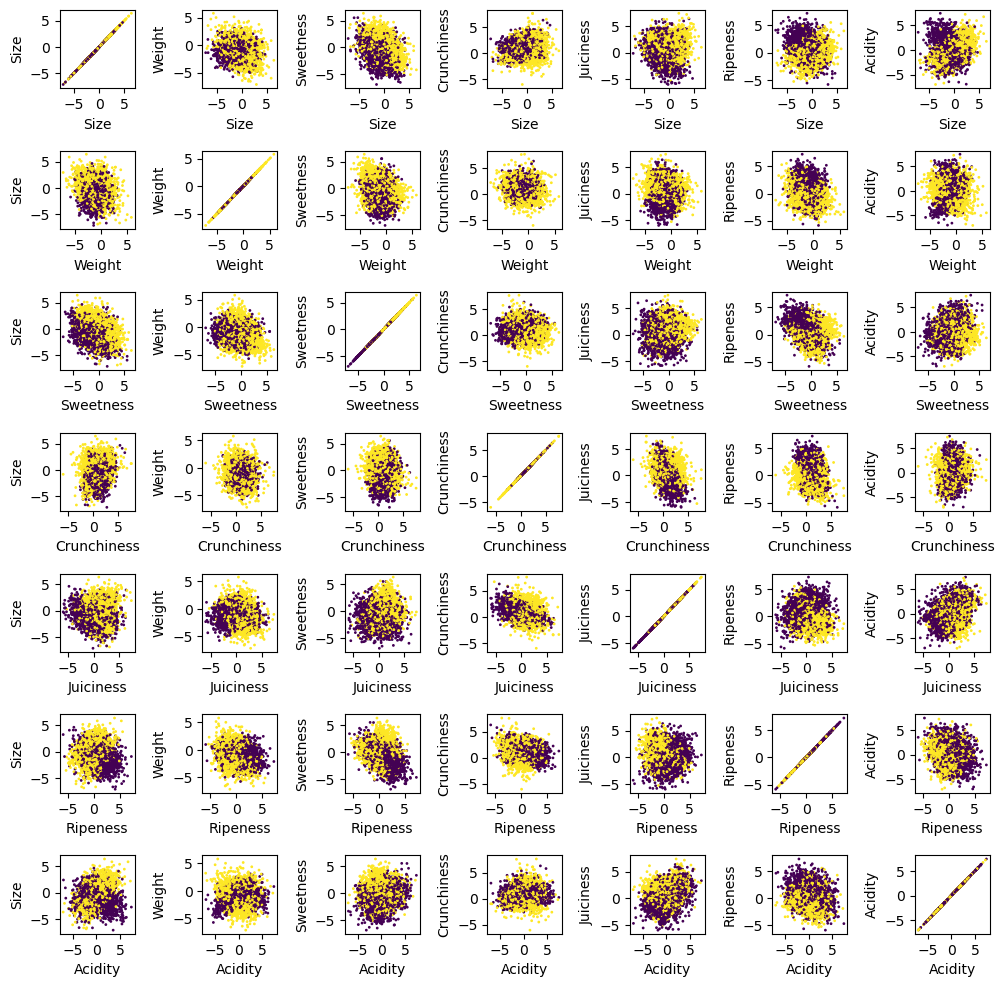

In [56]:
# Set up the plotting figure
fig = plt.figure(figsize = (12, 12))

# Initialize a variable for the number of columns
cols = len(apples.drop(['Quality'], axis=1).columns)
#yval = len(apples.drop(['Quality'], axis=1).columns)

# Loop through the columns for x axes
for i in range(cols):
    # Loop through the columns for y axes
    for j in range(cols):
        # Get the next spot in the grid
        plt.subplot2grid((xval, yval), (i, j), rowspan=1, colspan=1)
        # Create a scatter plot
        plt.scatter(apples.iloc[:,i], apples.iloc[:,j], c=apples.Quality, s=1)
        # Asign axis labels
        plt.xlabel(apples.iloc[:,i].name)
        plt.ylabel(apples.iloc[:,j].name)

# Adjust spacing between plots to ensure radable axes
plt.subplots_adjust(wspace = 0.9, hspace = 0.8)
# Show everything
plt.show